In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Datenaufbereitung


In [2]:
import os

data_path='/domino/datasets/local/TestData/iboxx_eur/'

## Komponenten als monatsweises Dictionary von DataFrames 

In [3]:
comp_list=os.listdir(data_path+'Components/')

comp={}

for file in comp_list:
    comp[file[-10:-4]]=pd.read_csv(data_path+'Components/'+file,encoding='latin_1')


In [4]:
comp.keys()

dict_keys(['202011', '202012', '202003', '202008', '202004', '202007', '202101', '202010', '202104', '202005', '202006', '202002', '202103', '202009', '202001', '202102'])

In [5]:
list(comp['202011'].columns)

['Date',
 'Price Type',
 'FX Version',
 'Index ISIN_CPi',
 'Index ISIN_TRi',
 'Index Name',
 'ISIN',
 'CUSIP',
 'Identifier',
 'Local 1',
 'Local 2',
 'Ticker',
 'Issuer',
 'Issuer Country',
 'Country Of Risk',
 'First Settlement Date',
 'Interest Accrual Date',
 'First Coupon Date',
 'Final Maturity',
 'Workout date',
 'Expected Remaining Life',
 'Time to Maturity',
 'Next Call Date',
 'Next Coupon Date',
 'Coupon',
 'Coupon Frequency',
 'Day Count Method',
 'Notional Amount',
 'Capped Notional Amount',
 'Bid Price',
 'Ask Price',
 'Bid_Ask_Spread',
 'Index Price',
 'Accrued Interest',
 'Ex-Dividend',
 'Coupon Adjustment',
 'Redemption Factor',
 'Base Market Value',
 'Capped Base Market Value',
 'Level 0',
 'Level 1',
 'Level 2',
 'Level 3',
 'Level 4',
 'Level 5',
 'Level 6',
 'Level 7',
 'Level 8',
 'Markit iBoxx Rating',
 'Seniority Level 1',
 'Seniority Level 2',
 'Seniority Level 3',
 'Is Fixed to Float',
 'Is Perpetual',
 'Is Hybrid Capital',
 'Is Callable',
 'Is Core index',
 '

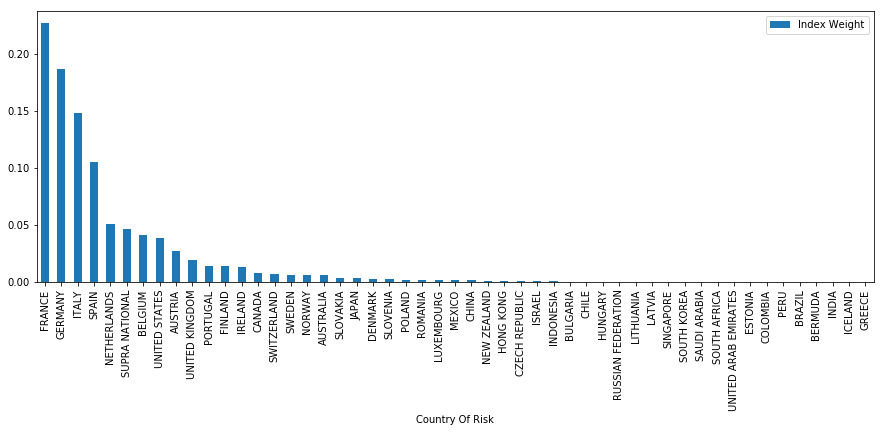

In [6]:
comp['202011'].groupby('Country Of Risk').sum().sort_values('Index Weight',ascending=False).plot(y=['Index Weight'],kind='bar',figsize=(15,5))

## Indizes als ein GesamtDataframe auf täglicher Basis

In [7]:
indices_list=os.listdir(data_path+'Indices')

indices={}

for file in indices_list:
    indices[file[-12:-4]]=pd.read_csv(data_path+'Indices/'+file,encoding='latin_1')

In [8]:
indices

{'20200427':            Date  Fixing Price Type      ISIN_CPi      ISIN_TRi BBG_Ticker_CPi  \
 0    2020-04-27  EU_EOD    Nominal  DE000A0JZA61  DE000A0JZA79       IBXXEF08   
 1    2020-04-27  EU_EOD    Nominal  DE000A0JZA87  DE000A0JZA95       IBXXEF10   
 2    2020-04-27  EU_EOD    Nominal  DE000A0JZAW0  DE000A0JZAX8           I4R5   
 3    2020-04-27  EU_EOD    Nominal  DE000A0JZAY6  DE000A0JZAZ3       IBXXEF12   
 4    2020-04-27  EU_EOD    Nominal  DE000A0JZB03  DE000A0JZB11       IBXXEF14   
 ..          ...     ...        ...           ...           ...            ...   
 663  2020-04-27  EU_EOD    Nominal  DE000A0G84P9  DE000A0G84Q7           I4BM   
 664  2020-04-27  EU_EOD    Nominal  DE000A0G9AB7  DE000A0G9AF8           QX63   
 665  2020-04-27  EU_EOD    Nominal  DE000A0JZA04  DE000A0JZA12       IBXXEF02   
 666  2020-04-27  EU_EOD    Nominal  DE000A0JZA20  DE000A0JZA38       IBXXEF04   
 667  2020-04-27  EU_EOD    Nominal  DE000A0JZA46  DE000A0JZA53       IBXXEF06   
 
  

In [9]:
i=0

for days in indices:
    if i==0:
        indices_df=pd.DataFrame(indices[days])
    else:
        indices_df=indices_df.append(indices[days],ignore_index=True)
    i=i+1

In [10]:
indices_df.shape

(223947, 114)

In [11]:
indices_df

,Date,Fixing,Price Type,ISIN_CPi,ISIN_TRi,BBG_Ticker_CPi,BBG_Ticker_TRi,Name,CPi_Today,TRi_Today,...,Gross Price Index,Coupon Income Index,Redemption Income Index,Income Index,Number of Bonds,Daily Sovereign Curve Swap Return,Daily Libor Swap Return,Month-to-date Sovereign Curve Swap Return,Month-to-date Libor Swap Return,Duration weighted exposure
0,2020-04-27,EU_EOD,Nominal,DE000A0JZA61,DE000A0JZA79,IBXXEF08,IBXXEF07,iBoxx  Financials A 7-10,86.268489,217.834660,...,91.877166,0.550375,0.0,0.550375,89,0.004549,0.003354,0.063897,0.059124,0.006255
1,2020-04-27,EU_EOD,Nominal,DE000A0JZA87,DE000A0JZA95,IBXXEF10,IBXXEF09,iBoxx  Financials AA 10+,169.181661,328.391972,...,172.211696,1.570549,0.0,1.570549,6,0.004758,0.003082,0.066742,0.061296,0.000513
2,2020-04-27,EU_EOD,Nominal,DE000A0JZAW0,DE000A0JZAX8,I4R5,I4R6,iBoxx  Eurozone 25+,191.778257,442.747176,...,182.665456,1.147176,0.0,1.147176,36,0.013643,0.009492,-0.015362,-0.038395,0.157952
3,2020-04-27,EU_EOD,Nominal,DE000A0JZAY6,DE000A0JZAZ3,IBXXEF12,IBXXEF11,iBoxx  Financials A 10+,120.915116,285.067430,...,131.015720,0.666907,0.0,0.666907,30,0.008700,0.007010,0.053253,0.047530,0.002773
4,2020-04-27,EU_EOD,Nominal,DE000A0JZB03,DE000A0JZB11,IBXXEF14,IBXXEF13,iBoxx  Financials BBB 5-7,128.733353,319.844879,...,132.603906,1.142832,0.0,1.142832,113,0.004949,0.004078,0.040526,0.037501,0.005163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223942,2020-02-06,EU_EOD,Nominal,DE000A0G84P9,DE000A0G84Q7,I4BM,I4BN,iBoxx  Non-Financials Subordinated,110.827250,218.060474,...,114.477004,0.183206,0.0,0.183206,74,0.001519,0.001425,0.008196,0.007367,0.003819
223943,2020-02-06,EU_EOD,Nominal,DE000A0G9AB7,DE000A0G9AF8,QX63,QX67,iBoxx  Covered 10-15,162.894871,364.686450,...,158.977915,0.415864,0.0,0.415864,48,0.000099,0.000415,0.002482,-0.000003,0.007685
223944,2020-02-06,EU_EOD,Nominal,DE000A0JZA04,DE000A0JZA12,IBXXEF02,IBXXEF01,iBoxx  Financials A 1-3,72.096497,184.598811,...,74.190607,0.095119,0.0,0.095119,127,0.000311,0.000047,0.000989,0.000337,0.002789
223945,2020-02-06,EU_EOD,Nominal,DE000A0JZA20,DE000A0JZA38,IBXXEF04,IBXXEF03,iBoxx  Financials A 3-5,86.034738,200.267516,...,90.437580,0.113427,0.0,0.113427,175,0.000619,0.000427,0.001772,0.001015,0.007404


In [12]:
OverallIndex=indices_df[indices_df['ISIN_TRi']=='DE0009682716']

In [13]:
OverallIndex=OverallIndex.sort_values('Date')

In [14]:
OverallIndex

,Date,Fixing,Price Type,ISIN_CPi,ISIN_TRi,BBG_Ticker_CPi,BBG_Ticker_TRi,Name,CPi_Today,TRi_Today,...,Gross Price Index,Coupon Income Index,Redemption Income Index,Income Index,Number of Bonds,Daily Sovereign Curve Swap Return,Daily Libor Swap Return,Month-to-date Sovereign Curve Swap Return,Month-to-date Libor Swap Return,Duration weighted exposure
164091,2019-12-31,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.364511,244.026149,...,107.104141,2.098787,0.026192,2.124979,4761,0.000024,-0.001666,0.006774,0.002652,1.014849
143590,2020-01-02,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.612544,244.603788,...,107.356248,0.001422,0.000000,0.001422,4772,-0.001279,-0.000102,-0.001279,-0.000102,0.995283
98316,2020-01-03,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.983938,245.444546,...,107.724941,0.001740,0.000000,0.001740,4772,-0.000641,0.000209,-0.001919,0.000107,0.988476
162374,2020-01-07,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.919711,245.349720,...,107.635544,0.049518,0.000000,0.049518,4772,0.000085,-0.000955,-0.002005,-0.001257,0.989240
176256,2020-01-08,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.764715,245.016015,...,107.489080,0.049518,0.000000,0.049518,4772,0.000766,0.000275,-0.001240,-0.000982,0.991936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71239,2021-04-13,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.158897,248.773864,...,106.586240,0.520335,0.071112,0.591447,5256,-0.000118,-0.000368,-0.000805,-0.001560,1.002824
90806,2021-04-14,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.004785,248.432470,...,106.434566,0.525681,0.071112,0.596793,5256,0.000709,0.000410,-0.000096,-0.001150,1.005582
52449,2021-04-15,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.217267,248.927752,...,106.630997,0.541537,0.071112,0.612649,5256,-0.000430,0.000245,-0.000526,-0.000906,1.001584
89264,2021-04-16,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.064247,248.588851,...,106.484446,0.542829,0.071112,0.613941,5256,0.000918,-0.000452,0.000392,-0.001358,1.004317


In [15]:
list(OverallIndex.columns)

['Date',
 'Fixing',
 'Price Type',
 'ISIN_CPi',
 'ISIN_TRi',
 'BBG_Ticker_CPi',
 'BBG_Ticker_TRi',
 'Name',
 'CPi_Today',
 'TRi_Today',
 'CPi_previous_EOM',
 'TRi_previous_EOM',
 'Cost Factor_TRi',
 'Cash',
 'Cost Factor_CPi',
 'Interest on Cash',
 'Simple Margin',
 'Discount Margin',
 'Duration',
 'Duration to Maturity',
 'Portfolio Duration',
 'Portfolio Duration to Maturity',
 'Annual Yield',
 'Annual Yield to Maturity',
 'Annual Modified Duration',
 'Annual Modified Duration to Maturity',
 'Annual Convexity',
 'Annual Convexity to Maturity',
 'Annual Portfolio Yield',
 'Annual Portfolio Yield to Maturity',
 'Annual Portfolio Modified Duration',
 'Annual Portfolio Modified Duration to Maturity',
 'Annual Portfolio Convexity',
 'Annual Portfolio Convexity to Maturity',
 'Semi-Annual Yield',
 'Semi-Annual Yield to Maturity',
 'Semi-Annual Modified Duration',
 'Semi-Annual Modified Duration to Maturity',
 'Semi-Annual Convexity',
 'Semi-Annual Convexity to Maturity',
 'Semi-Annual Port

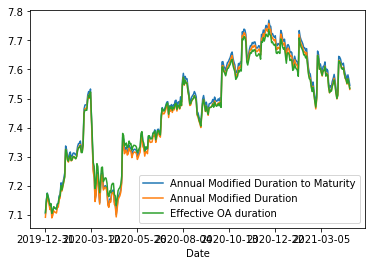

In [16]:
OverallIndex.plot(x='Date',y=['Annual Modified Duration to Maturity','Annual Modified Duration','Effective OA duration'])

## Underlyings als ein GesamtDataframe auf täglicher Basis

In [17]:
underlyings_list=os.listdir(data_path+'Underlyings')

underlyings={}

for file in underlyings_list:
    underlyings[file[-12:-4]]=pd.read_csv(data_path+'Underlyings/'+file,encoding='latin_1')

In [18]:
list(underlyings['20210419'].columns)

['Date',
 'Fixing',
 'Price Type',
 'FX Version',
 'Index ISIN_CPi',
 'Index ISIN_TRi',
 'Index Name',
 'ISIN',
 'CUSIP',
 'Identifier',
 'Local 1',
 'Local 2',
 'Ticker',
 'Issuer',
 'Issuer Country',
 'Coupon',
 'Workout date',
 'Final Maturity',
 'Expected Remaining Life',
 'Time To Maturity',
 'Next Call Date',
 'Next Coupon Date',
 'Coupon Frequency',
 'Bid Price',
 'Ask Price',
 'Bid_Ask_Spread',
 'Index Price',
 'Accrued Interest',
 'Dirty Index Price',
 'Ex-Dividend',
 'Coupon Payment',
 'Coupon Adjustment',
 'Current Redemption Payment',
 'Redemption Factor',
 'PIK Factor',
 'Notional Amount',
 'Capped Notional Amount',
 'Market Value',
 'Capped Market Value',
 'Cash Payment',
 'Capped Cash Payment',
 'Street Yield',
 'Annual Yield',
 'Semi-Annual Yield',
 'Street Yield to Maturity',
 'Annual Yield to Maturity',
 'Semi-Annual Yield to Maturity',
 'Simple Margin',
 'Discount Margin',
 'Duration',
 'Street Modified Duration',
 'Annual Modified Duration',
 'Semi-Annual Modified D

In [19]:
underlyings_df=pd.DataFrame()

for days in underlyings:
    underlyings_df=underlyings_df.append(underlyings[days][['Date','ISIN','Index Price','Daily Return']],ignore_index=True)

In [20]:
underlyings_df.shape

(1674865, 4)

In [21]:
underlyings_df

,Date,ISIN,Index Price,Daily Return
0,2021-04-06,FR0013310018,111.32720,-0.000738
1,2021-04-06,XS1811812574,119.20638,-0.000509
2,2021-04-06,DE000HCB0AD0,100.54592,-0.000183
3,2021-04-06,FR0013332988,103.40900,0.000768
4,2021-04-06,DE000A1KRJU8,110.95113,-0.000924
...,...,...,...,...
1674860,2021-01-11,FR0013248523,110.28754,-0.001045
1674861,2021-01-11,XS1405766624,109.35657,-0.001178
1674862,2021-01-11,XS1594335363,101.22476,-0.000126
1674863,2021-01-11,XS1569845404,105.33967,-0.000095


## Abtrennung Trainingsdatensatz

In [22]:
Startdatum='2019-12-01'
Enddatum='2021-03-31'

IndexISIN='DE0009682716'

N=50

IndexDaten=indices_df[(indices_df['ISIN_TRi']==IndexISIN) & 
                      (indices_df['Date']>=Startdatum) & 
                      (indices_df['Date']<=Enddatum)].sort_values('Date',ignore_index=True)
UnderlyingDaten=underlyings_df[(underlyings_df['Date']>=Startdatum) & 
                      (underlyings_df['Date']<=Enddatum)].sort_values(['Date','ISIN'],ignore_index=True)


In [23]:
IndexDaten

,Date,Fixing,Price Type,ISIN_CPi,ISIN_TRi,BBG_Ticker_CPi,BBG_Ticker_TRi,Name,CPi_Today,TRi_Today,...,Gross Price Index,Coupon Income Index,Redemption Income Index,Income Index,Number of Bonds,Daily Sovereign Curve Swap Return,Daily Libor Swap Return,Month-to-date Sovereign Curve Swap Return,Month-to-date Libor Swap Return,Duration weighted exposure
0,2019-12-31,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.364511,244.026149,...,107.104141,2.098787,0.026192,2.124979,4761,0.000024,-0.001666,0.006774,0.002652,1.014849
1,2020-01-02,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.612544,244.603788,...,107.356248,0.001422,0.000000,0.001422,4772,-0.001279,-0.000102,-0.001279,-0.000102,0.995283
2,2020-01-03,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.983938,245.444546,...,107.724941,0.001740,0.000000,0.001740,4772,-0.000641,0.000209,-0.001919,0.000107,0.988476
3,2020-01-07,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.919711,245.349720,...,107.635544,0.049518,0.000000,0.049518,4772,0.000085,-0.000955,-0.002005,-0.001257,0.989240
4,2020-01-08,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.764715,245.016015,...,107.489080,0.049518,0.000000,0.049518,4772,0.000766,0.000275,-0.001240,-0.000982,0.991936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2021-03-25,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.926906,250.327148,...,107.361084,0.436790,0.046602,0.483392,5225,-0.000707,-0.000825,-0.000068,0.004868,0.988622
315,2021-03-26,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.749524,249.933518,...,107.189837,0.438984,0.046602,0.485587,5225,0.000617,0.000407,0.000548,0.005276,0.991739
316,2021-03-29,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.496625,249.388817,...,106.908518,0.479629,0.053344,0.532973,5225,0.000490,0.000096,0.001039,0.005373,0.996076
317,2021-03-30,EU_EOD,Nominal,DE0009682708,DE0009682716,QW7,QW7A,iBoxx  Overall,108.230818,248.793733,...,106.648616,0.483960,0.053344,0.537304,5225,0.000668,-0.000208,0.001707,0.005164,1.000846


In [24]:
UnderlyingDaten

,Date,ISIN,Index Price,Daily Return
0,2019-12-31,AT0000383864,148.14875,0.000113
1,2019-12-31,AT0000A001X2,106.98867,0.000089
2,2019-12-31,AT0000A04967,162.46453,0.000068
3,2019-12-31,AT0000A0DXC2,131.66525,0.000098
4,2019-12-31,AT0000A0N9A0,109.76767,0.000089
...,...,...,...,...
1606532,2021-03-31,XS2305600723,99.33031,0.000771
1606533,2021-03-31,XS2305736543,99.24102,0.001440
1606534,2021-03-31,XS2306220190,100.04950,0.000655
1606535,2021-03-31,XS2306517876,98.60933,0.001603


In [25]:
comp['202011'].shape

(5158, 120)

In [26]:
def StartComp(N=30,Components=comp,Year=2020,Month=11):
    key=str(Year)
    
    if len(str(Month))==2:
        key=key+str(Month)
    else:
        key=key+'0'+str(Month)
        
        ISIN_Set=set(Components[key].sort_values('Index Weight').iloc[0:N]['ISIN'])
        
        Weights=np.array(Components[key]['Index Weight'])
        
        w=np.where(np.isin(Weights,np.array(Components[key].sort_values('Index Weight').iloc[0:N]['Index Weight'])),Weights,0)
        w=w/w.sum()
    
    return (ISIN_Set,w)

In [27]:
ActComp=StartComp(N,Year=2020,Month=1)[0]

## Optimierung über non negative least squares (NNLS)

Optimierungsproblem: Minimiere Tracking Error unter den Nebenbedingungen, dass die Gewichte größer als 0 sein müssen und nur ein Teil der Komponenten verwendet werden sollen um Kosten zu sparen.
Aufbau: Anhand der Daten der letzten Monate werden die Gewichte für den kommenden Monat geschätzt.



In [28]:
from scipy.optimize import nnls

## Optimierung über Preis

In [29]:
IndexDaten['Date'].apply(pd.to_datetime)
IndexPrice=IndexDaten[['Date','Gross Price Index']].set_index('Date')

In [30]:
UnderlyingPrice=UnderlyingDaten[UnderlyingDaten['ISIN'].isin(ActComp)][['Date','ISIN','Index Price']]
UnderlyingPrice['Date'].apply(pd.to_datetime)
UnderlyingPrice=UnderlyingPrice.pivot(index='Date',columns='ISIN',values='Index Price')

In [31]:
UnderlyingPrice

ISIN,AT0000A2A6W3,BE0002669506,BE6317283610,DE000A2R7JD3,DE000A2R7JE1,DE000A2R8ND3,DE000A2R8NE1,DE000A2TSDZ7,DE000A2YNQ58,DE000A2YNZY4,...,XS2058855441,XS2060691040,XS2064302735,XS2065698834,XS2075811781,XS2077546682,XS2078409716,XS2078667925,XS2082345955,XS2086861437
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,97.79566,97.54595,98.38388,95.16323,94.09900,98.07050,95.92167,98.37860,86.12500,96.49438,...,97.54208,97.77250,95.01013,96.22221,97.48683,96.18975,96.04933,97.61128,97.61443,NaN
2020-01-02,98.29998,98.01628,98.75584,95.69625,94.87703,98.50590,97.00250,99.18243,87.17000,97.28756,...,98.02752,98.34333,96.06767,96.71236,98.16899,96.89479,97.42867,98.07060,98.16800,98.57428
2020-01-03,98.72602,98.41257,98.99330,96.18200,95.54250,98.86885,97.89225,99.84290,88.23250,97.99772,...,98.45695,98.92500,96.86200,97.13487,98.55169,97.51025,98.32333,98.57228,98.67387,98.99075
2020-01-07,98.85777,98.55146,98.86435,96.19300,95.44373,98.84225,97.63125,99.98312,91.00000,97.57923,...,98.57462,98.90042,96.67945,97.28087,98.58608,97.30453,98.01750,98.39694,98.67305,99.11068
2020-01-08,98.71680,98.49039,98.69115,95.95288,94.97075,98.62625,96.98225,99.68300,91.57773,96.90812,...,98.45065,98.66567,95.90115,97.13269,98.43591,97.06859,97.09790,98.10973,98.48645,99.07650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,101.14150,100.94134,100.82612,100.53329,101.26386,102.38108,105.52577,102.34599,NaN,101.33909,...,101.03820,100.48488,100.32680,100.01247,102.66398,100.39500,102.43259,101.01488,102.21240,101.71182
2021-03-26,100.94760,100.72854,100.78196,100.32835,100.95760,102.26385,105.09512,101.99174,NaN,101.04536,...,100.83546,100.23756,99.90240,99.81475,102.54242,100.17282,101.70860,100.80100,102.03234,101.49695
2021-03-29,100.69933,100.46422,100.68138,100.04190,100.43870,102.07550,104.40500,101.53574,NaN,100.75610,...,100.64712,99.98000,99.25533,99.55642,102.40900,99.82829,100.95176,100.53584,101.68548,101.25139


In [32]:
Prices=pd.merge(IndexPrice,UnderlyingPrice,left_index=True,right_index=True)

In [33]:
Prices.fillna(method='ffill',axis=0,inplace=True)

In [34]:
Prices

,Gross Price Index,AT0000A2A6W3,BE0002669506,BE6317283610,DE000A2R7JD3,DE000A2R7JE1,DE000A2R8ND3,DE000A2R8NE1,DE000A2TSDZ7,DE000A2YNQ58,...,XS2058855441,XS2060691040,XS2064302735,XS2065698834,XS2075811781,XS2077546682,XS2078409716,XS2078667925,XS2082345955,XS2086861437
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,107.104141,97.79566,97.54595,98.38388,95.16323,94.09900,98.07050,95.92167,98.37860,86.12500,...,97.54208,97.77250,95.01013,96.22221,97.48683,96.18975,96.04933,97.61128,97.61443,NaN
2020-01-02,107.356248,98.29998,98.01628,98.75584,95.69625,94.87703,98.50590,97.00250,99.18243,87.17000,...,98.02752,98.34333,96.06767,96.71236,98.16899,96.89479,97.42867,98.07060,98.16800,98.57428
2020-01-03,107.724941,98.72602,98.41257,98.99330,96.18200,95.54250,98.86885,97.89225,99.84290,88.23250,...,98.45695,98.92500,96.86200,97.13487,98.55169,97.51025,98.32333,98.57228,98.67387,98.99075
2020-01-07,107.635544,98.85777,98.55146,98.86435,96.19300,95.44373,98.84225,97.63125,99.98312,91.00000,...,98.57462,98.90042,96.67945,97.28087,98.58608,97.30453,98.01750,98.39694,98.67305,99.11068
2020-01-08,107.489080,98.71680,98.49039,98.69115,95.95288,94.97075,98.62625,96.98225,99.68300,91.57773,...,98.45065,98.66567,95.90115,97.13269,98.43591,97.06859,97.09790,98.10973,98.48645,99.07650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,107.361084,101.14150,100.94134,100.82612,100.53329,101.26386,102.38108,105.52577,102.34599,18.30227,...,101.03820,100.48488,100.32680,100.01247,102.66398,100.39500,102.43259,101.01488,102.21240,101.71182
2021-03-26,107.189837,100.94760,100.72854,100.78196,100.32835,100.95760,102.26385,105.09512,101.99174,18.30227,...,100.83546,100.23756,99.90240,99.81475,102.54242,100.17282,101.70860,100.80100,102.03234,101.49695
2021-03-29,106.908518,100.69933,100.46422,100.68138,100.04190,100.43870,102.07550,104.40500,101.53574,18.30227,...,100.64712,99.98000,99.25533,99.55642,102.40900,99.82829,100.95176,100.53584,101.68548,101.25139


In [35]:
Prices_train=Prices[pd.to_datetime(Prices.index).month==10]
Prices_test=Prices[pd.to_datetime(Prices.index).month==11]

In [36]:
b_train=np.array(Prices_train.iloc[:,0])
b_test=np.array(Prices_test.iloc[:,0])

In [37]:
A_train=np.array(Prices_train.iloc[:,1:N+1])
A_test=np.array(Prices_test.iloc[:,1:N+1])

In [38]:
np.argwhere(np.isnan(A_train))

array([], shape=(0, 2), dtype=int64)

In [39]:
(x, rnorm)=nnls(A_train,b_train)

In [40]:
rnorm

0.2751742974932374

In [41]:
A_train.shape

(22, 50)

In [42]:
x.shape

(50,)

In [43]:
np.append(rnorm,x).T.shape

(51,)

In [44]:
A_test@x

array([109.10476356, 109.04350479, 109.19632862, 109.30974688,
       109.21243045, 108.7176749 , 108.55133435, 108.75646643,
       108.93675836, 109.01286582, 109.06340116, 109.21281067,
       109.19646235, 109.28654225, 109.37921919, 109.33267582,
       109.32185257, 109.38630669, 109.46819889, 109.48605809,
       109.44505811])

In [45]:
b_test

array([109.13978181, 109.15812242, 109.33378065, 109.36487894,
       109.26076217, 108.62829309, 108.53116104, 108.72936203,
       108.93692271, 109.07197982, 109.14612135, 109.2854488 ,
       109.27214197, 109.34280764, 109.40252688, 109.34355446,
       109.34467554, 109.36626303, 109.44114389, 109.44209059,
       109.33584585])

In [46]:
b_test.shape

(21,)

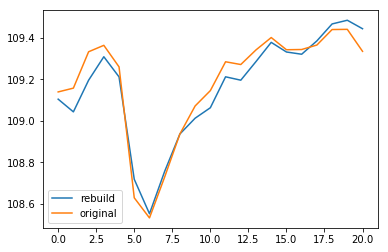

In [47]:
r=range(b_test.shape[0])
plt.plot(r,A_test@x, label='rebuild')
plt.plot(r,b_test, label='original')
plt.axis()
plt.legend()

In [48]:
(pd.to_datetime(Prices_test.index[-1])-pd.to_datetime(Prices.index[0])).days

335

In [49]:
Prices_test.index[-1]

'2020-11-30'

In [50]:
def MonthDelta(Year,Month,n):
    
    Month_new=Month+n
    
    if Month_new>12 or Month_new<1:
        Month=Month_new%12
        Year=Year+Month_new//12
        if Month==0:
            Month=12
            Year=Year-1
    else:
        Month=Month_new
    
    return (Year,Month)

In [51]:
MonthDelta(2021,1,-12)

(2020, 1)

In [52]:
def SinglePeriodPrice(N,Components,Index,Underlying,Year,Month,NMonth=6,i=0):
    ActComp=StartComp(N,Components,Year,Month)
    #print(Year,'-',Month,':',ActComp)
    
    IndexPrice=Index[['Date','Gross Price Index']].set_index('Date')
    UnderlyingPrice=Underlying[Underlying['ISIN'] \
                               .isin(ActComp)][['Date','ISIN','Index Price']] \
                               .pivot(index='Date',columns='ISIN',values='Index Price')
    
    Prices=pd.merge(IndexPrice,UnderlyingPrice,left_index=True,right_index=True)
    Prices=Prices.fillna(method='ffill',axis=0).fillna(method='bfill',axis=0)
    (YearTrain,MonthTrain)=MonthDelta(Year,Month,-NMonth)
    Prices_train=Prices[((pd.to_datetime(Prices.index).year<Year)| \
                  ((pd.to_datetime(Prices.index).month<=Month) & (pd.to_datetime(Prices.index).year==Year))) & \
                       ((pd.to_datetime(Prices.index).year>YearTrain)| \
                  ((pd.to_datetime(Prices.index).month>=MonthTrain) & (pd.to_datetime(Prices.index).year==YearTrain)))]
    (YearTest,MonthTest)=MonthDelta(Year,Month,1)
    Prices_test=Prices[(~Prices.index.isin(Prices_train.index)) & \
                       (pd.to_datetime(Prices.index).month==MonthTest) & \
                       (pd.to_datetime(Prices.index).year==YearTest)]
    
    
    b=np.array(Prices_train.iloc[:,0])
    A=np.array(Prices_train.iloc[:,1:N+1])
    
    (x, rnorm)=nnls(A,b)
    
    # Testnorm
    
    b=np.array(Prices_test.iloc[:,0])
    A=np.array(Prices_test.iloc[:,1:N+1])
    
    print('Test'+str(Year)+str(Month)+':'+str(norm(A@x-b)))
    
    #Plot
    
    #b=np.append(b,np.array(Prices_test.iloc[:,0]))
    #A=np.append(A,np.array(Prices_test.iloc[:,1:N+1]),axis=0)
    
    b=np.array(Prices.iloc[:,0])
    A=np.array(Prices.iloc[:,1:N+1])
    r=np.array(pd.to_datetime(Prices.index))
    vert1=pd.to_datetime(Prices_train.index[0])
    vert2=pd.to_datetime(Prices_train.index[-1])

    #print(pd.to_datetime(Prices_train.index[-1]),'-',pd.to_datetime(Prices.index[0]))
    #print(vert)
    
    #r=range(b.shape[0])

    plt.figure(i,figsize=(15,5))
    plt.plot(r,A@x, label='rebuild')
    plt.plot(r,b, label='original')
    plt.axvline(vert1)
    plt.axvline(vert2)
    plt.legend()
    plt.title(str(Year)+'_'+str(Month))
    
    return {'TE':{str(Year)+'-'+str(Month):rnorm},'Weights':pd.DataFrame(x,index=UnderlyingPrice.columns,columns=[str(Year)+'-'+str(Month)])}

In [54]:
SinglePeriodPrice(200,comp,IndexDaten,UnderlyingDaten,2021,1,NMonth=6)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/algorithms.py:475: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps, values)


RuntimeError: too many iterations

In [55]:
def MultiPeriodPrice(N,Components,Index,Underlying,NMonth=6):
    i=0
    j=0
    for YearMonth in Components.keys():
        #print(YearMonth)
        Year=int(YearMonth[0:4])
        #print(Year)
        Month=int(YearMonth[4:6])
        #print(Month)
        if j>=NMonth:
            ActDict=SinglePeriodPrice(N,Components,Index,Underlying,Year,Month,NMonth,i)
            if i==0:
                ResDict=ActDict
            else:
                ResDict['TE'].update(ActDict['TE'])
                ResDict['Weights']=pd.merge(ResDict['Weights'],ActDict['Weights'], \
                               how='outer',left_index=True,right_index=True)
            i=i+1
            #print(ResDict)
        j=j+1
        
    
    return ResDict

In [56]:
Result=MultiPeriodPrice(50,comp,IndexDaten,UnderlyingDaten,NMonth=6)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/algorithms.py:475: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps, values)


RuntimeError: too many iterations

In [ ]:
Result

## Optimierung über Return

In [ ]:
def Perform(r,Start=100):
    i=0
    Result=np.empty(1)
    for r_i in r:
        if i==0:
            p_i=Start*(1+r_i)
            Result=np.array(p_i)
        else:
            p_i=p_i*(1+r_i)
            Result=np.append(Result,p_i)
        i=i+1
        #print(str(r_i)+'->'+str(p_i))
    return Result

In [ ]:
IndexReturn=IndexDaten[['Date','Daily Return']].set_index('Date')

In [ ]:
UnderlyingReturn=UnderlyingDaten[UnderlyingDaten['ISIN'].isin(ActComp)][['Date','ISIN','Daily Return']] \
                    .pivot(index='Date',columns='ISIN',values='Daily Return')

In [ ]:
Returns=pd.merge(IndexReturn,UnderlyingReturn,left_index=True,right_index=True)

In [ ]:
Returns.fillna(value=0,inplace=True)

In [ ]:
Returns

In [ ]:
Returns_train=Returns[pd.to_datetime(Returns.index).month==10]
Returns_test=Returns[pd.to_datetime(Returns.index).month==11]

In [ ]:
b_train=np.array(Returns_train.iloc[:,0])
b_test=np.array(Returns_test.iloc[:,0])

In [ ]:
A_train=np.array(Returns_train.iloc[:,1:N+1])
A_test=np.array(Returns_test.iloc[:,1:N+1])

In [ ]:
np.argwhere(np.isnan(A_train))

In [ ]:
(x, rnorm)=nnls(A_train,b_train)

In [ ]:
rnorm

In [ ]:
A_train.shape

In [ ]:
x.shape

In [ ]:
np.append(rnorm,x).T.shape

In [ ]:
A_test@x

In [ ]:
b_test

In [ ]:
b_test.shape

In [ ]:
r=range(b_test.shape[0])
plt.plot(r,Perform(A_test@x), label='rebuild')
plt.plot(r,Perform(b_test), label='original')
plt.axis()
plt.legend()

In [ ]:
def SinglePeriodReturn(N,Components,Index,Underlying,Year,Month,NMonth=6,i=0):
    ActComp=StartComp(N,Components,Year,Month)
    #print(Year,'-',Month,':',ActComp)
    
    IndexReturn=Index[['Date','Daily Return']].set_index('Date')
    UnderlyingReturn=Underlying[Underlying['ISIN'] \
                               .isin(ActComp)][['Date','ISIN','Daily Return']] \
                               .pivot(index='Date',columns='ISIN',values='Daily Return')
    
    Returns=pd.merge(IndexReturn,UnderlyingReturn,left_index=True,right_index=True)
    Returns=Returns.fillna(value=0)
    (YearTrain,MonthTrain)=MonthDelta(Year,Month,-NMonth+1)
    Returns_train=Returns[((pd.to_datetime(Returns.index).year<Year)| \
                  ((pd.to_datetime(Returns.index).month<=Month) & (pd.to_datetime(Returns.index).year==Year))) & \
                       ((pd.to_datetime(Returns.index).year>YearTrain)| \
                  ((pd.to_datetime(Returns.index).month>=MonthTrain) & (pd.to_datetime(Returns.index).year==YearTrain)))]
    (YearTest,MonthTest)=MonthDelta(Year,Month,1)
    #print(YearTest)
    #print(MonthTest)
    Returns_test=Returns[(~Returns.index.isin(Returns_train.index)) & \
                       (pd.to_datetime(Returns.index).month==MonthTest) & \
                       (pd.to_datetime(Returns.index).year==YearTest)]
    
    
    b=np.array(Returns_train.iloc[:,0])
    A=np.array(Returns_train.iloc[:,1:N+1])
    
    vert=b.shape[0]
    
    (x, rnorm)=nnls(A,b)
    
    # Testnorm
    
    b=np.array(Returns_test.iloc[:,0])
    A=np.array(Returns_test.iloc[:,1:N+1])
    
    print('Test'+str(Year)+str(Month)+':'+str(norm(A@x-b)))
    
    #Plot
    
    #b=np.append(b,np.array(Returns_test.iloc[:,0]))
    #A=np.append(A,np.array(Returns_test.iloc[:,1:N+1]),axis=0)
    
    b=np.array(Returns.iloc[:,0])
    A=np.array(Returns.iloc[:,1:N+1])
    r=np.array(pd.to_datetime(Returns.index))
    vert1=pd.to_datetime(Returns_train.index[0])
    vert2=pd.to_datetime(Returns_train.index[-1])

    #print(pd.to_datetime(Returns_train.index[-1]),'-',pd.to_datetime(Returns.index[0]))
    #print(vert)
    
    #r=range(b.shape[0])

    plt.figure(i,figsize=(15,5))
    plt.plot(r,Perform(A@x), label='rebuild')
    plt.plot(r,Perform(b), label='original')
    plt.axvline(vert1)
    plt.axvline(vert2)
    plt.legend()
    plt.title(str(Year)+'_'+str(Month))
    
    return {'TE':{str(Year)+'-'+str(Month):rnorm},'Weights':pd.DataFrame(x,index=UnderlyingReturn.columns,columns=[str(Year)+'-'+str(Month)])}

In [ ]:
SinglePeriodReturn(50,comp,IndexDaten,UnderlyingDaten,2020,11,3)

In [ ]:
def MultiPeriodReturn(N,Components,Index,Underlying,NMonth=6):
    i=0
    j=0
    for YearMonth in Components.keys():
        #print(YearMonth)
        Year=int(YearMonth[0:4])
        #print(Year)
        Month=int(YearMonth[4:6])
        #print(Month)
        if j>=NMonth:
            ActDict=SinglePeriodReturn(N,Components,Index,Underlying,Year,Month,NMonth,i)
            if i==0:
                ResDict=ActDict
            else:
                ResDict['TE'].update(ActDict['TE'])
                ResDict['Weights']=pd.merge(ResDict['Weights'],ActDict['Weights'], \
                               how='outer',left_index=True,right_index=True)
            i=i+1
            #print(ResDict)
        j=j+1
        
    
    return ResDict
    

In [ ]:
MonthDelta(2021,1,-1)

In [ ]:
Result=MultiPeriodReturn(200,comp,IndexDaten,UnderlyingDaten,6)

In [ ]:
Result

## Export

from datetime import datetime
from dateutil import tz
Result['Weights'].to_csv('results/Out_'+datetime.now(tz.gettz('GMT+2')).strftime('%Y%m%d_%H%M%S')+'.csv',sep='\t',decimal=',')

datetime.now().isoformat()#.strftime('%Y%m%d_%H%M%S')

In [57]:
TestComp=StartComp(30,comp,2020,1)
TestComp

({'BE0002669506',
  'DE000A2R7JD3',
  'DE000A2R7JE1',
  'DE000A2R8NE1',
  'DE000A2YNQ58',
  'DE000A2YNZY4',
  'DE000DL19UW8',
  'FR0013445137',
  'FR0013447075',
  'FR0013450822',
  'FR0013451416',
  'FR0013453172',
  'NL0013995095',
  'XS1316569638',
  'XS2035473748',
  'XS2049090595',
  'XS2049146215',
  'XS2049583789',
  'XS2049584084',
  'XS2049630028',
  'XS2049769297',
  'XS2051032444',
  'XS2051655095',
  'XS2058855441',
  'XS2064302735',
  'XS2065698834',
  'XS2075811781',
  'XS2077546682',
  'XS2078409716',
  'XS2082345955'},
 array([0., 0., 0., ..., 0., 0., 0.]))

In [58]:
w=np.isin(comp['202001']['ISIN'],TestComp,).astype(int)

/usr/local/anaconda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [59]:
w.sum()

0

In [60]:
import math

def d (gamma,p,w):
    return 1/math.log(1+gamma/p)/(p+w)

def LAIT (StartComp,IndexPrice,CompPrice,maxiter=1000,eps=0.01,p=0.1,gamma=0.05,lamb=0.5):
    # Zählvariable definieren
    k=0
    # w ist der Gewichtsvektor, der iterativ bestimmt wird
    w=StartComp
    # conv soll die Verbesserung der Zielfunktion messen
    conv=eps
    TE_last=norm(CompPrice@StartComp-IndexPrice)
    
    dv = lambda x: d(gamma,p,x)
        
    while (conv>=eps) & (k<=maxiter):
        c=dv(w)
        b=np.concatenate((IndexPrice,np.zeros(StartComp.shape)),axis=None)
        A=np.concatenate((CompPrice,lamb*np.diag(c)),axis=0)
        
        w,TE=nnls(A,b)
        
        print('Iteration: ',k,'-->TE:',TE)
        
        conv=abs(TE-TE_last)
        
        TE_last=TE
        k=k+1
    
    return (w,TE)
        

In [61]:
CompPrice=UnderlyingDaten[['Date','ISIN','Index Price']]
CompPrice=CompPrice.set_index(pd.to_datetime(CompPrice.Date))
CompPrice=CompPrice[(CompPrice.index.year==2020) & (CompPrice.index.month == 1)]
CompPrice=CompPrice.pivot(index='Date',columns='ISIN',values='Index Price')
CompPrice=np.array(CompPrice)
CompPrice

array([[148.628  , 106.9565 , 163.64855, ...,  99.927  ,  99.9822 ,
        100.04119],
       [149.08825, 106.968  , 164.81538, ...,  99.982  , 100.19362,
        100.63147],
       [149.10425, 106.95783, 164.98858, ...,  99.98433, 100.18982,
        100.49476],
       ...,
       [149.83875, 106.72433, 167.65628, ..., 100.15823, 100.5496 ,
        101.52117],
       [150.08675, 106.7295 , 168.4683 , ..., 100.20538, 100.65495,
        101.78906],
       [150.3555 , 106.72517, 169.22083, ..., 100.25093, 100.75683,
        102.08937]])

In [62]:
IndexPrice=IndexDaten.set_index(pd.to_datetime(IndexDaten.Date))
IndexPrice=IndexPrice[(IndexPrice.index.year==2020) & (IndexPrice.index.month == 1)]
IndexPrice=np.array(IndexPrice['Gross Price Index'])
IndexPrice

array([107.35624764, 107.7249413 , 107.63554436, 107.48907984,
       107.29894615, 107.41014738, 107.10396989, 107.19688586,
       107.32506267, 107.3026339 , 107.31410471, 107.36894778,
       107.57681675, 107.62631542, 107.9851666 , 108.09384425,
       108.64995932, 108.50081459, 108.70400685, 108.89671527,
       109.04953267])

In [63]:
IndexPrice.shape

(21,)

In [64]:
np.array(CompPrice)

array([[148.628  , 106.9565 , 163.64855, ...,  99.927  ,  99.9822 ,
        100.04119],
       [149.08825, 106.968  , 164.81538, ...,  99.982  , 100.19362,
        100.63147],
       [149.10425, 106.95783, 164.98858, ...,  99.98433, 100.18982,
        100.49476],
       ...,
       [149.83875, 106.72433, 167.65628, ..., 100.15823, 100.5496 ,
        101.52117],
       [150.08675, 106.7295 , 168.4683 , ..., 100.20538, 100.65495,
        101.78906],
       [150.3555 , 106.72517, 169.22083, ..., 100.25093, 100.75683,
        102.08937]])

In [65]:
CompPrice.shape

(21, 4772)

In [66]:
ActComp=np.ones(CompPrice.shape[1])/CompPrice.shape[1]

In [67]:
ActComp=StartComp(Year=2020,Month=1)
ActComp[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
ActComp[1].sum()

1.0

In [69]:
dv = lambda x: d(0.1,0.001,x)
dv(ActComp[1])

array([216.67906534, 216.67906534, 216.67906534, ..., 216.67906534,
       216.67906534, 216.67906534])

In [70]:
d(0.1,0.001,ActComp[1][5])

216.67906533553165

In [84]:
ActComp=np.random.rand(CompPrice.shape[1])
ActComp=ActComp/ActComp.sum()
ActComp.sum()

1.0

In [88]:
ActComp.dtype

dtype('float64')

In [89]:
(w,TE)=LAIT(ActComp,IndexPrice,CompPrice,maxiter=100,gamma=0.2,lamb=100,p=0.00001,eps=0.0001)

Iteration:  0 -->TE: 348.4264554485641
Iteration:  1 -->TE: 422.8781262184712
Iteration:  2 -->TE: 443.9973525447661
Iteration:  3 -->TE: 231.2632876153236
Iteration:  4 -->TE: 20.2563558112959
Iteration:  5 -->TE: 14.67322952034982
Iteration:  6 -->TE: 13.363663441497456
Iteration:  7 -->TE: 12.48311454596135
Iteration:  8 -->TE: 12.2414160294201
Iteration:  9 -->TE: 12.227893130972944
Iteration:  10 -->TE: 12.227848107001178


In [90]:
np.where(w!=0,1,0).sum()

4768

In [73]:
TE

2.445767554024233

In [74]:
dv(w)

array([216.66618427, 216.6643801 , 216.67832009, ..., 216.66711109,
       216.66878777, 216.67395024])

In [75]:
b=np.concatenate((IndexPrice,np.zeros(StartComp.shape)),axis=None)
b

AttributeError: 'function' object has no attribute 'shape'

In [ ]:
c=np.ones(CompPrice.shape[1])
A=np.concatenate((CompPrice,0.5*np.diag(c)),axis=0)
A

In [ ]:
np.eye(c.shape[0]).shape

In [ ]:
np.diag(c)

In [ ]:
np.zeros(StartComp.shape).shape

In [ ]:
IndexPrice.shape